In [6]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
# 1. Cargar el dataset
df = pd.read_csv("empresas_etapa_temprana_final.csv", sep=",")

In [8]:
# 2. Variables categóricas a codificar
categorical_cols = ['last_funding_type', 'category', 'num_employees_enum']
for col in categorical_cols:
    df[col] = LabelEncoder().fit_transform(df[col].astype(str))

# 3. Variables binarias (ya están como 0 y 1)
binary_cols = ['has_linkedin', 'has_facebook', 'has_twitter']

# 4. Variables numéricas
numeric_cols = [
    'equity_funding_total', 'num_articles', 'last_equity_funding_total',
    'num_investments_funding_rounds', 'ipqwery_num_trademark_registered',
    'ipqwery_num_patent_granted', 'num_investors', 'num_lead_investors',
    'funding_total', 'num_funding_rounds', 'last_funding_total',
    'num_founders', 'num_female_founders', 'num_male_founders',
    'twitter_followers', 'company_age', 'distance_to_fifth_year'
]

# 5. Unir todo para el clustering
features = numeric_cols + categorical_cols + binary_cols
X = df[features]

# 6. Normalizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [9]:
def encontrar_mejor_k(X_scaled, k_min=2, k_max=10):
    inertias = []
    silhouette_scores = []
    ks = list(range(k_min, k_max + 1))

    for k in ks:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        labels = kmeans.fit_predict(X_scaled)
        inertias.append(kmeans.inertia_)
        silhouette_scores.append(silhouette_score(X_scaled, labels))

    # Gráficos
    fig, ax = plt.subplots(1, 2, figsize=(12, 4))

    ax[0].plot(ks, inertias, marker='o')
    ax[0].set_title("Método del Codo")
    ax[0].set_xlabel("Número de Clusters (k)")
    ax[0].set_ylabel("Inercia (SSE)")
    ax[0].grid(True)

    ax[1].plot(ks, silhouette_scores, marker='o', color='green')
    ax[1].set_title("Silhouette Score")
    ax[1].set_xlabel("Número de Clusters (k)")
    ax[1].set_ylabel("Puntaje de Silueta")
    ax[1].grid(True)

    plt.tight_layout()
    plt.show()

    # Determinar mejor k
    best_k = ks[silhouette_scores.index(max(silhouette_scores))]
    print(f"✅ Mejor número de clusters según Silhouette Score: {best_k}")

    return best_k


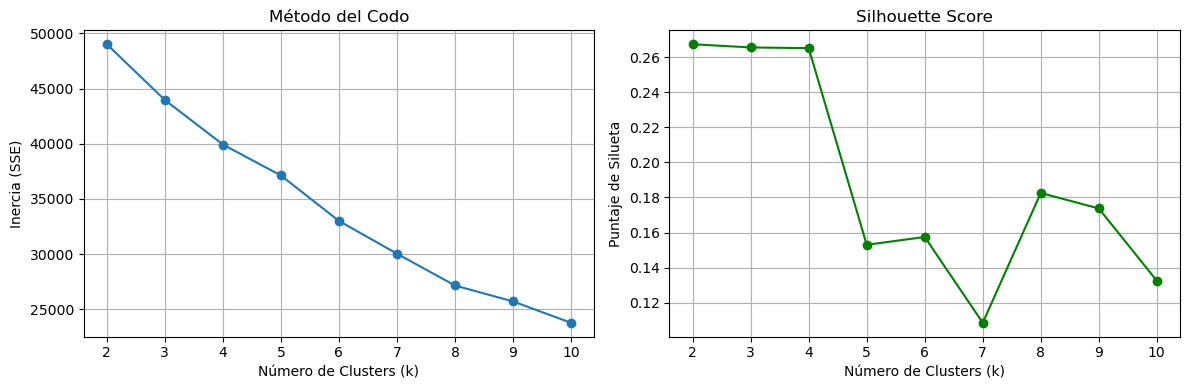

✅ Mejor número de clusters según Silhouette Score: 2


In [10]:
mejor_k = encontrar_mejor_k(X_scaled)

In [11]:
kmeans = KMeans(n_clusters=mejor_k, random_state=42, n_init=10)
df['kmeans_cluster'] = kmeans.fit_predict(X_scaled)


In [12]:
# Columnas numéricas y categóricas relevantes para analizar
cols_para_resumen = [
    'equity_funding_total', 'num_articles', 'last_equity_funding_total',
    'num_investments_funding_rounds', 'num_investors', 'num_founders',
    'num_female_founders', 'num_male_founders', 'twitter_followers',
    'ipqwery_num_patent_granted', 'ipqwery_num_trademark_registered',
    'funding_total', 'num_funding_rounds', 'last_funding_total',
    'company_age', 'distance_to_fifth_year'
]

# Crear resumen agrupado por cluster
resumen_clusters = df.groupby('kmeans_cluster')[cols_para_resumen].mean().round(2)
print("\n📊 Resumen de clusters (media por variable):\n")
print(resumen_clusters)



📊 Resumen de clusters (media por variable):

                equity_funding_total  num_articles  last_equity_funding_total  \
kmeans_cluster                                                                  
0                         1861939.12          2.26               3.979376e+06   
1                        43713012.45         19.76               2.615401e+09   

                num_investments_funding_rounds  num_investors  num_founders  \
kmeans_cluster                                                                
0                                         0.00           3.28          2.09   
1                                         0.02          13.37          2.46   

                num_female_founders  num_male_founders  twitter_followers  \
kmeans_cluster                                                              
0                              0.24               1.87              81.75   
1                              0.32               2.15             191.98   

   